In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandasql import sqldf
sns.set(style = 'whitegrid')

In [2]:
path = os.path.normpath(os.getcwd() + os.sep + os.pardir) + "\[3] Data_Preprocessing" + "\_final_processed.csv"
print(path)

H:\Projects\Epsilon InternShip\Cars Price Prediction\[3] Data_Preprocessing\_final_processed.csv


In [3]:
data = pd.read_csv(path,encoding='latin-1')
data.tail()

,Make,Model,CC,Used since,Km,Transmission,City,Color,Body Style,Fuel,...,Rear camera,GPS,Fog light,Rear spoiler,Cruise control,Power Seats,Central lock,Alarm,Price,Is_CC
37740,Skoda,Octavia A5,0,2008,144000,automatic,Helwan,Black,None,gas,...,True,False,False,True,True,False,True,True,155000,False
37741,Toyota,Corolla,0,2019,59000,automatic,Mansoura,White,None,gas,...,False,False,False,False,True,False,True,True,362000,False
37742,Lada,2107,0,2011,43000,manual,Alexandria,Silver,None,gas,...,False,False,False,False,False,False,False,False,65000,False
37743,Renault,Logan,0,2013,0,manual,El Qanater El Khayreya,Red,None,gas,...,False,False,False,False,False,False,False,False,80000,False
37744,BMW,X1,0,2014,123000,automatic,Giza,Silver,None,gas,...,False,False,False,False,False,False,False,False,310000,False


In [4]:
def Pie(feature,limit= 10,title=" "):
    global data
    plt.figure(figsize=(12,6))
    values = data[feature].value_counts()[:limit]
    plt.pie(values , labels = list(values.index),autopct='%1.f%%',labeldistance=1.1)
    plt.title(title)
    plt.show()
def Kde(feature):
    global data
    plt.figure(figsize=(12,6))
    sns.kdeplot(data[feature],shade=True)
    plt.show()
    
def countPlot(feature):
    global data
    plt.figure(figsize=(11,6))
    sns.countplot(x=feature , data=data)
    plt.show()
    

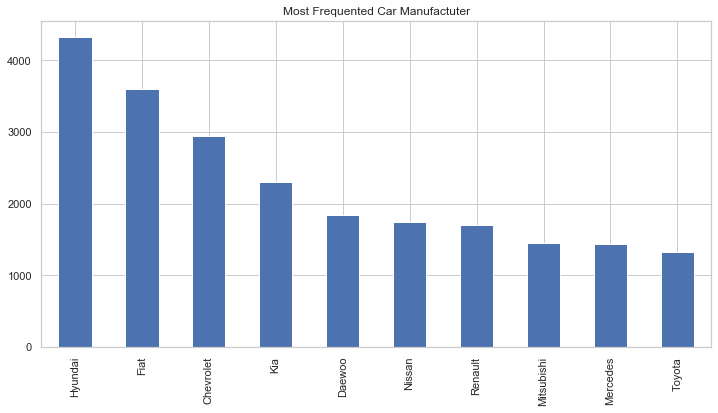

In [5]:
plt.figure(figsize=(12,6))
data['Make'].value_counts()[:10].plot(kind='bar')
plt.title('Most Frequented Car Manufactuter')
plt.show()

most car manufacturer is "hyundai"

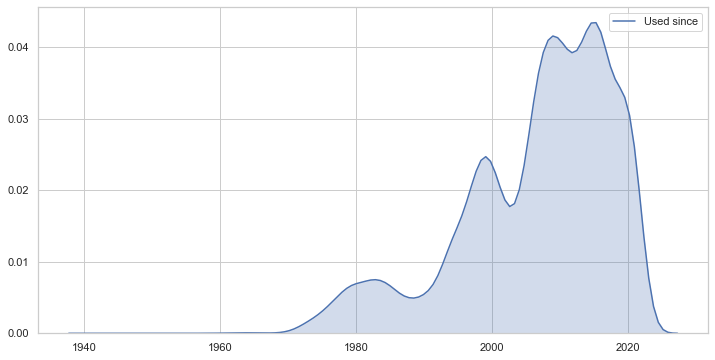

In [95]:
Kde('Used since')

The year most cars were manufactured in 2015

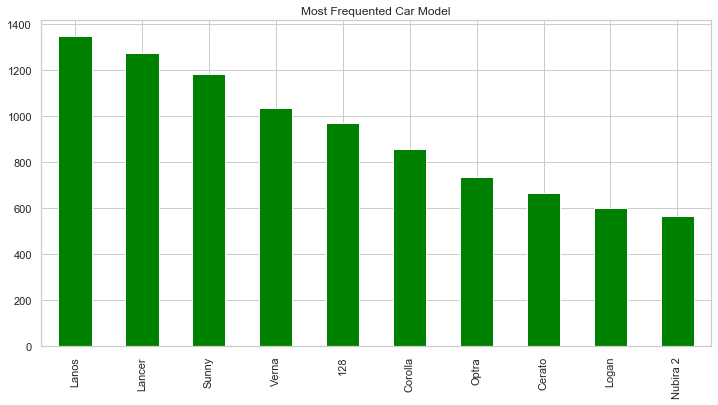

In [7]:
plt.figure(figsize=(12,6))
data['Model'].value_counts()[:10].plot(kind='bar',color='Green')
plt.title('Most Frequented Car Model')
plt.show()

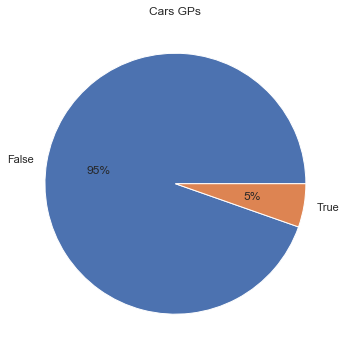

In [8]:
Pie('GPS',title="Cars GPs")

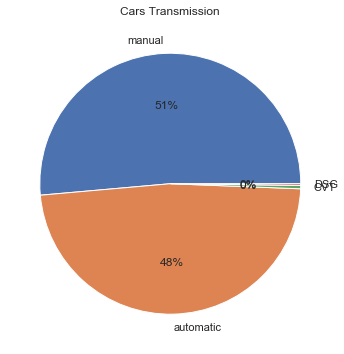

In [9]:
Pie('Transmission',title="Cars Transmission")

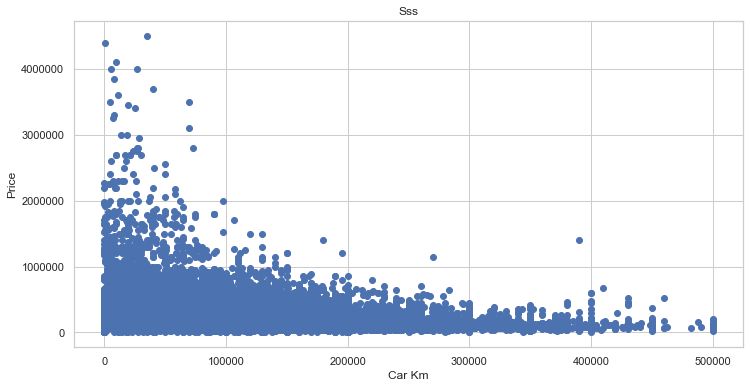

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(x=data['Km'],y=data['Price'])
plt.xlabel('Car Km')
plt.ylabel("Price")
plt.title('Sss')
plt.show()

In [66]:
MaketoPrice=data.groupby('Make').mean()['Price'] / 10000
MaketoPrice = pd.DataFrame({"Make":MaketoPrice.index,'Price':MaketoPrice.values })
MaketoPrice = MaketoPrice.sort_values('Price',ascending = False)[:15]

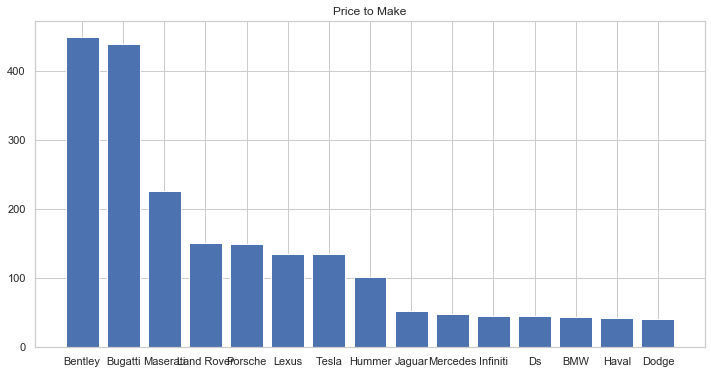

In [68]:
plt.figure(figsize=(12,6))
plt.bar(MaketoPrice.Make , height = MaketoPrice.Price)
plt.title('Price to Make')
plt.show()

as we can see here , the price of car affected by it manufacturer

In [70]:
FuelToPrice = data.groupby('Fuel').mean()['Price'] / 10000
FuelToPrice = pd.DataFrame({'Fuel':FuelToPrice.index , 'Price':FuelToPrice.values})

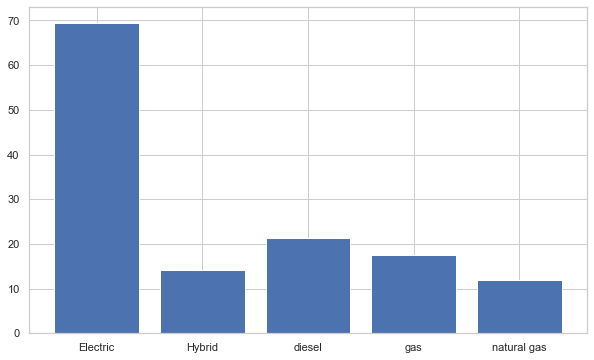

In [80]:
plt.figure(figsize=(10,6))
plt.bar(x=FuelToPrice.Fuel , height = FuelToPrice.Price)
plt.show()

In [78]:
Style_Price = data.groupby('Body Style').mean()['Price']/1000
Style_Price = pd.DataFrame({'Style':Style_Price.index , 'Price':Style_Price.values})
Style_Price = Style_Price.sort_values('Price',ascending=False)

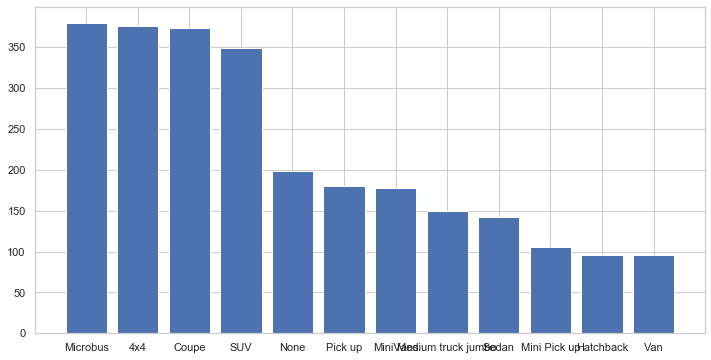

In [82]:
plt.figure(figsize=(12,6))
plt.bar(x=Style_Price.Style , height = Style_Price.Price)
plt.show()

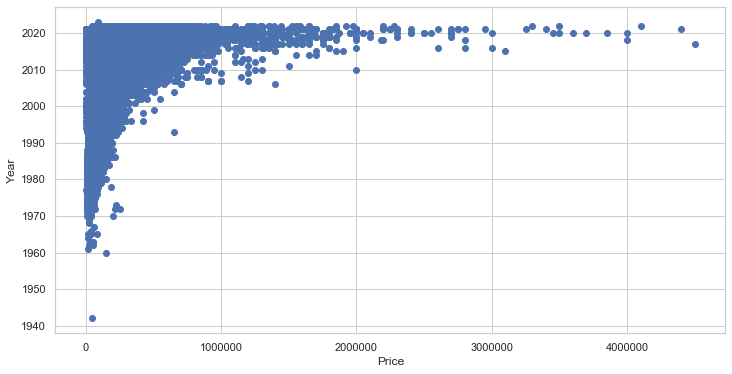

In [93]:
plt.figure(figsize=(12,6))
plt.scatter(x=data['Price'] , y = data['Used since'])
plt.xlabel("Price")
plt.ylabel("Year")
plt.show()